In [44]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Read Dataset
data = pd.read_csv('Salary_dataset.csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [46]:
# Dataset Size
data.shape

(30, 3)

In [47]:
#Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [48]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [49]:
# To find missing values
data.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Unnamed: 0'),
  Text(1.5, 0, 'YearsExperience'),
  Text(2.5, 0, 'Salary')])

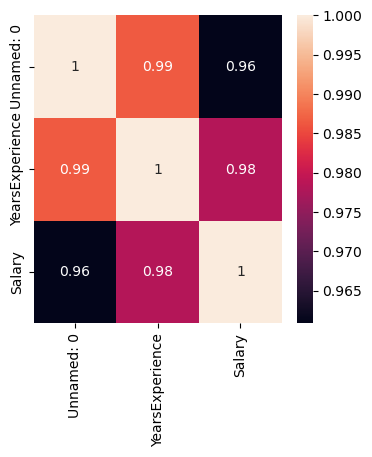

In [50]:
# Heatmap of data
plt.subplots(figsize=(4,4))
sns.heatmap(data.corr(), annot = True)
plt.xticks(rotation = 90)

In [51]:
# Splitting data 
X = data['YearsExperience']
X.head()

0    1.2
1    1.4
2    1.6
3    2.1
4    2.3
Name: YearsExperience, dtype: float64

In [52]:
#Splitting Data
y = data['Salary']
y.head()

0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64

In [53]:
# Splitting the dataset
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [54]:
# Adding a Column
X_train = np.vstack((np.ones_like(X_train), X_train)).T
X_test = np.vstack((np.ones_like(X_test), X_test)).T

In [55]:
# Function to perform
def linear_regression(X, Y, learning_rate, epochs):
    m, n = X.shape
    weights = np.zeros(n)
    cost_list = []
    
    for _ in range(epochs):
        prediction = np.dot(X, weights)
        error = prediction - Y
        gradient = np.dot(X.T, error) / m
        weights -= learning_rate * gradient
        
        #Calculate the Cost
        cost = (1/(2*m)) * np.sum(error**2)
        cost_list.append(cost)
        
    return weights, cost_list

In [56]:
# Train the model
learning_rate = 0.01
epochs = 5000
weights, cost_list = linear_regression(X_train, Y_train, learning_rate, epochs)

In [57]:
# Predict on the Test Set
Y_pred_test = np.dot(X_test, weights)

In [58]:
# Calculate the Regression Metrics
mse = np.mean((Y_test - Y_pred_test)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(Y_test - Y_pred_test))
total_variance = np.sum((Y_test - np.mean(Y_test))**2)
r_squared = 1- (mse / total_variance)

In [59]:
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"Total Variance: {total_variance}")
print(f"R2 Score: {r_squared}")

MSE: 37784560.75170817
RMSE: 6146.9147343775785
MAE: 5161.298695079268
Total Variance: 5807725838.888889
R2 Score: 0.9934940867045238


In [60]:
results_data = pd.DataFrame({
    'Actual Values': Y_test,
    'Predicted Values': Y_pred_test,
    'Difference (Actual - Predicted)': Y_test - Y_pred_test
})

#Print Dataframe
results_data

,Actual Values,Predicted Values,Difference (Actual - Predicted)
27,112636.0,115574.746707,-2938.746707
15,67939.0,71680.886277,-3741.886277
23,113813.0,102499.979770,11313.020230
17,83089.0,75416.533973,7672.466027
8,64446.0,55804.383568,8641.616432
9,57190.0,60473.943188,-3283.943188
28,122392.0,122112.130175,279.869825
24,109432.0,107169.539390,2262.460610
12,56958.0,63275.678961,-6317.678961


In [61]:
df = {
    'Actual Values': [56958.0, 83089.0, 109432.0, 112636.0, 122392.0],
    'Predicted Values': [60654.614934, 74277.259618, 107169.539390, 115574.746707, 122112.130175]
}
df1 = pd.DataFrame(df)

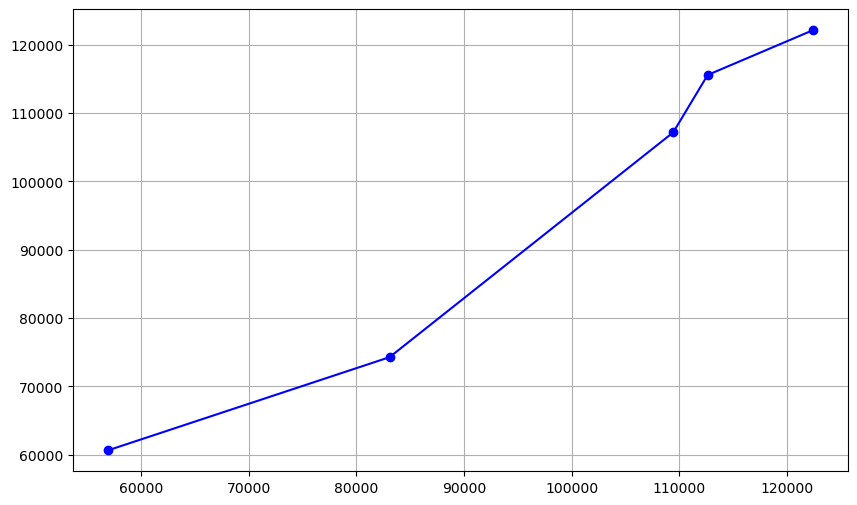

In [62]:
plt.figure(figsize=(10,6))
plt.plot(df1['Actual Values'], df1['Predicted Values'], marker = 'o', linestyle = '-', color = 'blue')
plt.grid(True)

# Display the plot
plt.show()